 #  A Whale off the Port(folio)

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

# Table of Contents

1. [Imports](#imp)

2. [Data Cleaning](#data)
   
   2.1 [Whale Returns](#whale)
   
   2.2 [Algorithmic Daily Returns](#algo)
  
   2.3 [S&P 500 Returns](#sp)
  
   2.4 [Combine Whale, Algorithmic, and S&P 500 Returns](#combine1)
  
3. [Portfolio Analysis](#port1)

   3.1 [Performance](#perfo)
  
   3.2 [Risk](#risk1)
  
   3.3 [Rolling Statistics](#rollsta1)
  
   3.4 [Sharpe Ratios](#shar1)
  
4. [Portfolio Returns](#port2)

   4.1 [Read & Clean the Dataframes](#data2)
  
   4.2 [Weighted Returns](#weighted)
  
   4.3 [Combine Portfolios](#combine2)
  
   4.4 [Portfolio Performance](#perf2)
  
   4.5 [Risk Analysis](#risk2)
  
   4.6 [Sharpe Ratios](#shar2)
  
   4.7 [Correlation Analysis](#corr2)
  
   4.8 [Beta Analysis](#beta)
  
5. [Summary](#summ)

 #  Imports
<a id="imp"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning
<a id="data"></a>

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns
<a id="whale"></a>

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_df = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
# Read in CSV, covert dates to datetime_index, sort dataframe in ascending order
whale_returns_df = pd.read_csv(whale_returns_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)

# Confrim null values have been removed from df
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns
<a id="algo"></a>

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_df = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)

# Confirm null values have been removed from df
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns
<a id="sp"></a>

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_df = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
# Remove the '$'
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
# YOUR CODE HERE
# Calculate nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [14]:
# Drop nulls
# YOUR CODE HERE
# Remove null values & confirm 
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Drop nulls
# YOUR CODE HERE
# print daily_returns
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename Column
# YOUR CODE HERE
columns = ["S&P 500"]
sp500_daily_returns.columns = columns 
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns
<a id="combine1"></a>

In [17]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis
<a id="port1"></a>
In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance
<a id="perfo"></a>

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

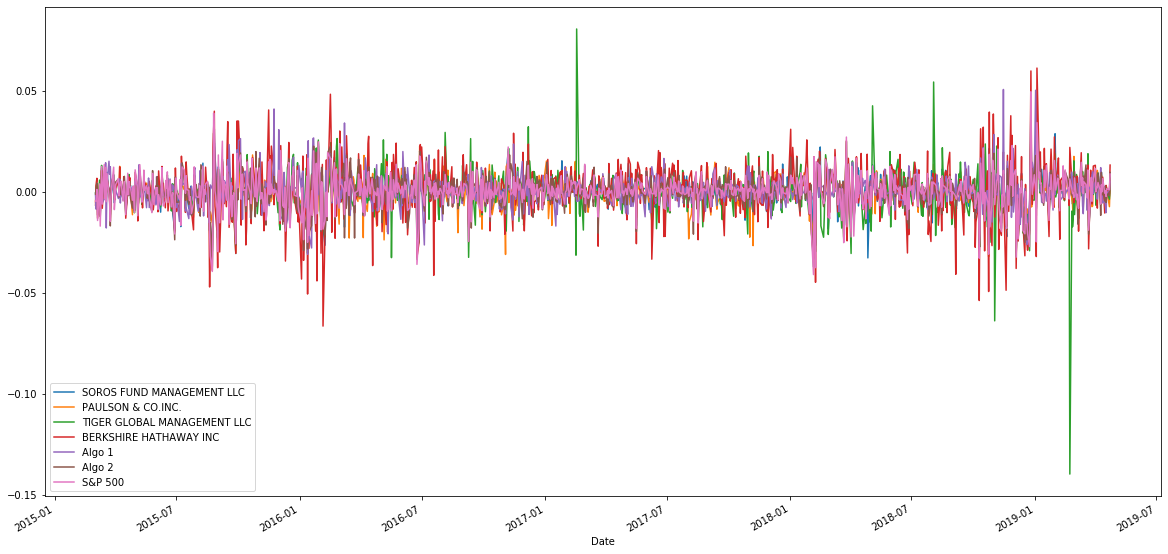

In [18]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10))


In [19]:
# Plot cumulative returns
# YOUR CODE HERE
# First, calculate cumulative returns
cumulative_returns = (1 + combined_df).cumprod() -1 
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


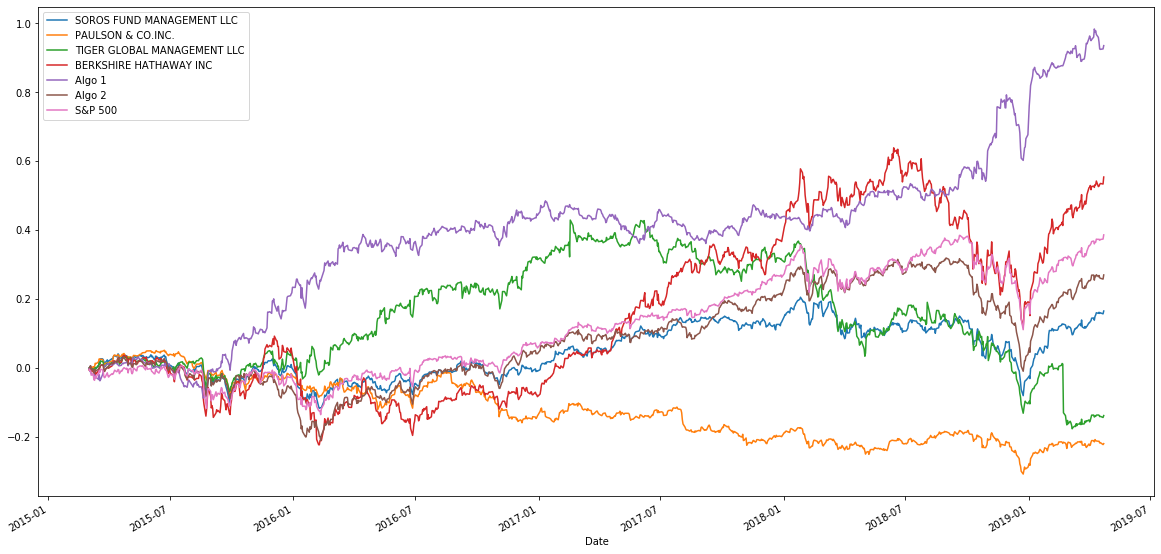

In [20]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns.plot(figsize=(20,10))

### Does any portfolio outperform the S&P 500?

Based on the cumulative returns plot, the portfolio that appears to outperform the S&P 500 is the "Algo 1" portfolio.

---

## Risk
<a id="risk1"></a>

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

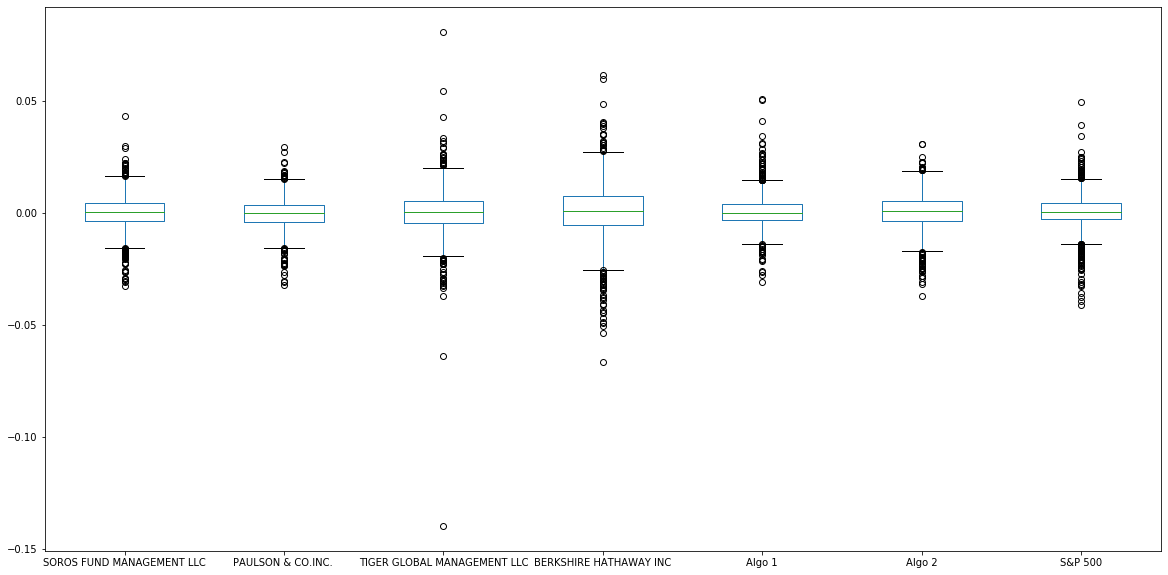

In [21]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10))

### Which box has the largest spread? Which has the smallest spread?

The box with the largest spread is Berkshire Hathaway Inc (closely proceeded by Tiger Global Management LLC). The box with the smallest spread is Paulson & Co Inc.

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
portfolio_volatility = combined_df.std()
portfolio_volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

combined_df["S&P 500"].std() < portfolio_volatility


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Which portfolios are riskier than the S&P 500?

The two portfolios containing higher volatility than the S&P 500 are; Tiger Global Management LLC and Berkshire Hathaway Inc. 

In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_volatility = combined_df.std() * np.sqrt(252)
annualized_volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics
<a id="rollsta1"></a>

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

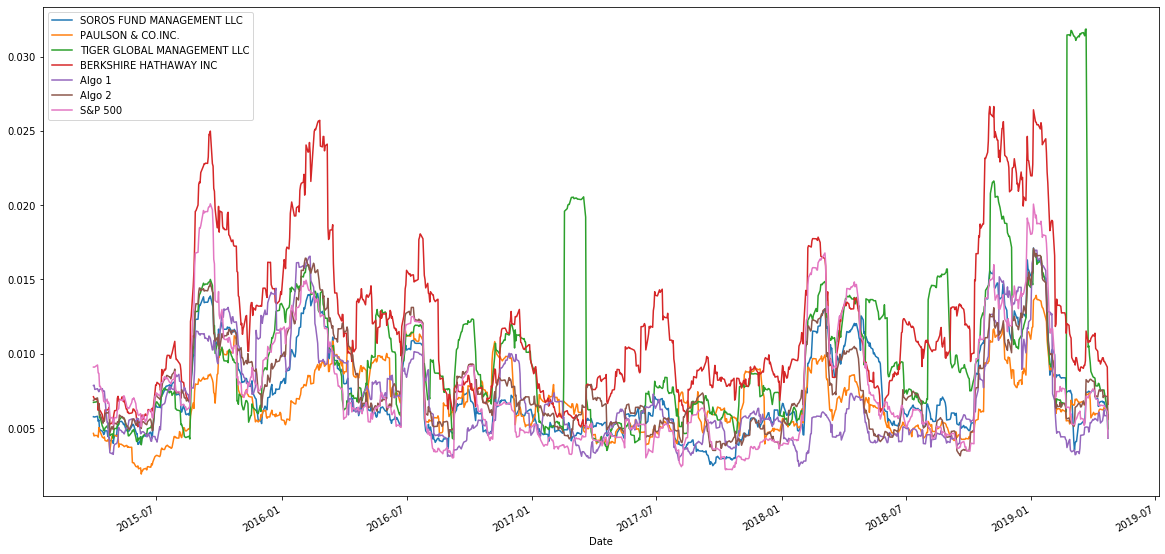

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

Based on the 21-day window plotted rolling standard deviation of the entire portfolio, it is fair to say; when the risk icnreases in the market (S&P 500) generally, the risk increases for the equities considered in this scenario. 

In [26]:
# Construct a correlation table
# YOUR CODE HERE
combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [155]:
sp500_correlation = pd.DataFrame(combined_df.corr()).loc[:, "S&P 500"]
sp500_correlation[sp500_correlation==sp500_correlation[sp500_correlation<1].max()]

Algo 2    0.858764
Name: S&P 500, dtype: float64

### Which returns most closely mimic the S&P?

The returns that best correlate with the market (S&P 500) is the Algo 2 portfolio. 

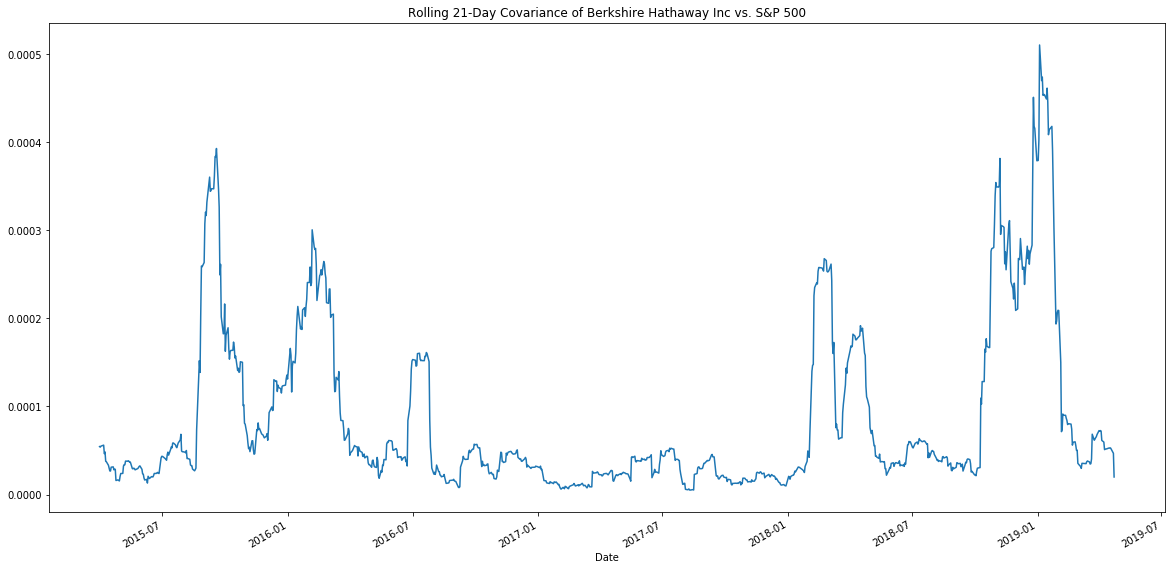

In [162]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Calculate rolling covariance for Berkshire Hathaway Inc portfolio 
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_df['S&P 500'])
rolling_covariance.plot(figsize=(20,10), title='Rolling 21-Day Covariance of Berkshire Hathaway Inc vs. S&P 500')

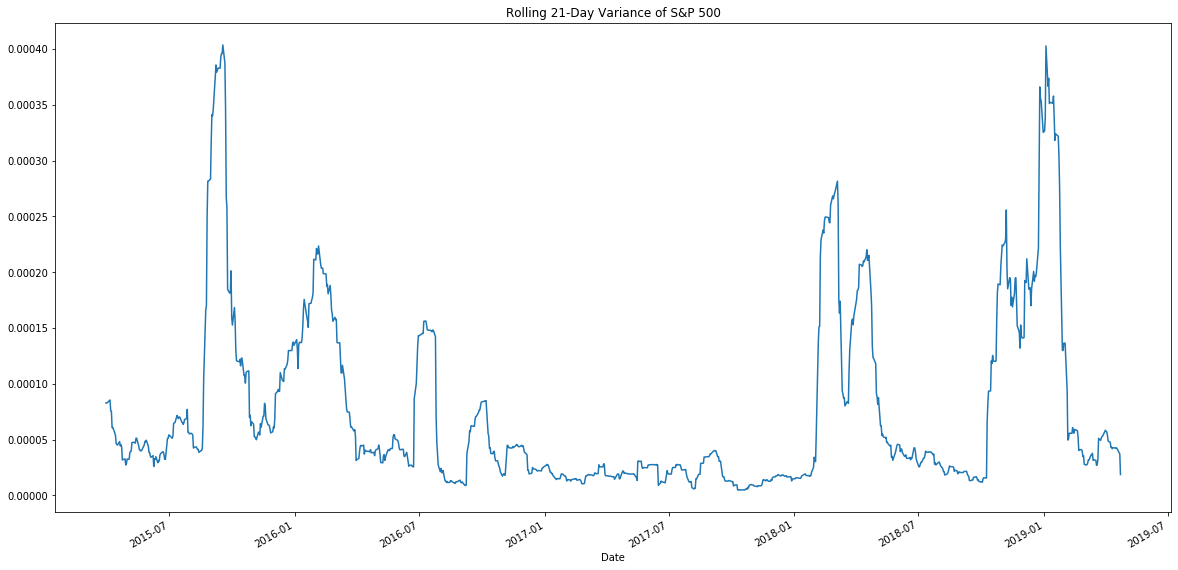

In [163]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Calculate rolling variance for the market to compare to Berkshire Hathaway Inc portfolio 
rolling_variance = combined_df['S&P 500'].rolling(window=21).var()
rolling_variance.plot(figsize=(20,10), title='Rolling 21-Day Variance of S&P 500')

In [169]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Calculate the rolling beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.tail(10)

Date
2019-04-09    1.183661
2019-04-10    1.189559
2019-04-11    1.240214
2019-04-12    1.209945
2019-04-15    1.242536
2019-04-16    1.248331
2019-04-17    1.242711
2019-04-18    1.258626
2019-04-22    1.262289
2019-04-23    1.066739
dtype: float64

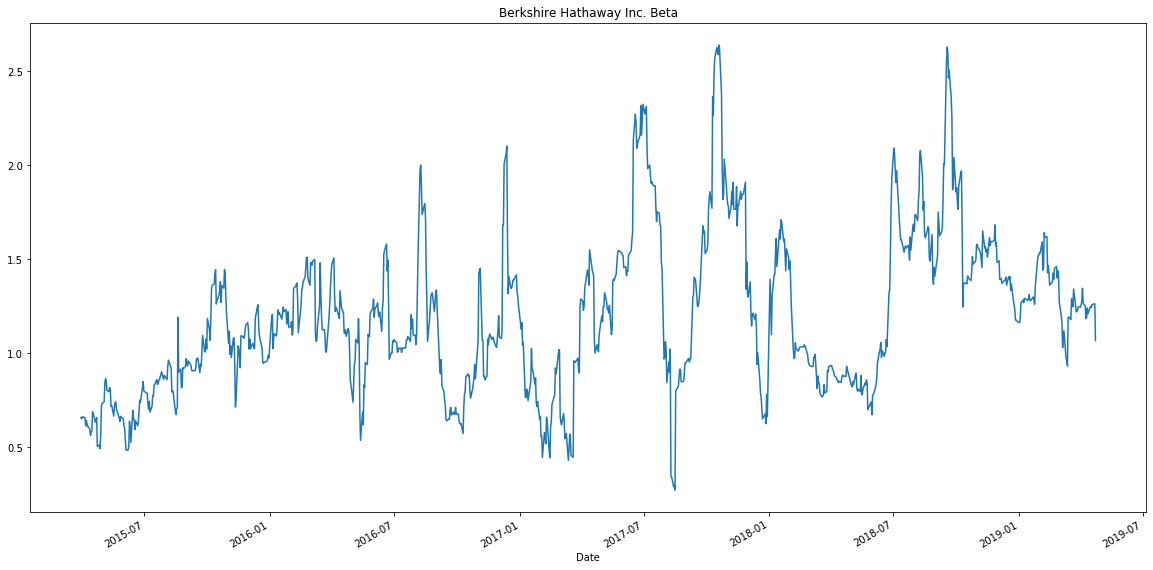

In [170]:
# Plot the rolling beta
rolling_beta.plot(figsize=(20,10), title='Berkshire Hathaway Inc. Beta')

### Does the portfolio seem sensitive to movements in the S&P 500?

Based on the above calculated beta, the equity is sensitive to the market (S&P 500). The beta for Berkshire Hathaway Inc on average is greater than 1, menaing will move in the same direction as the market and is more volatile than the S&P 500.


In [160]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
# Couldn't figure out this challenge question :(

---

## Sharpe Ratios
<a id="shar1"></a>

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

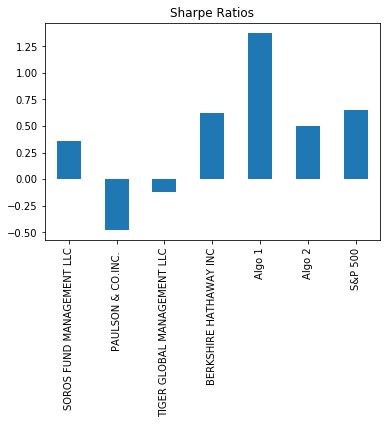

In [32]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Based on the sharpe ratios performance analysis, the "Algo 1" strategy outperforms both 'the market' and 'the whales' portfolio. However, the metric indicates that "Algo 2" did not beat 'the market' or 'the whales' portfolio. 

---

# Portfolio Returns
<a id="port2"></a>

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

## Read & Clean the Dataframes
<a id="data2"></a>

In [60]:
# Read the first stock
# YOUR CODE HERE
amzn_df = Path("My_Portfolio_Resources/AMZN_historical.csv")
amzn_df = pd.read_csv(amzn_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df = amzn_df.sort_index()
amzn_df.rename(columns = {"Close":"AMZN_Close"}, inplace=True)
amzn_df.head()

,Symbol,AMZN_Close
Date,,
2018-05-11 16:00:00,AMZN,1602.91
2018-05-14 16:00:00,AMZN,1601.54
2018-05-15 16:00:00,AMZN,1576.12
2018-05-16 16:00:00,AMZN,1587.28
2018-05-17 16:00:00,AMZN,1581.76


In [61]:
# Read the second stock
# YOUR CODE HERE
msft_df = Path("My_Portfolio_Resources/MSFT_historical.csv")
msft_df = pd.read_csv(msft_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
msft_df = msft_df.sort_index()
msft_df.rename(columns = {"Close":"MSFT_Close"}, inplace=True)
msft_df.head()

,Symbol,MSFT_Close
Date,,
2018-05-11 16:00:00,MSFT,97.70
2018-05-14 16:00:00,MSFT,98.03
2018-05-15 16:00:00,MSFT,97.32
2018-05-16 16:00:00,MSFT,97.15
2018-05-17 16:00:00,MSFT,96.18


In [62]:
# Read the third stock
# YOUR CODE HERE
tsla_df = Path("My_Portfolio_Resources/TSLA_historical.csv")
tsla_df = pd.read_csv(tsla_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.sort_index()
tsla_df.rename(columns = {"Close":"TSLA_Close"}, inplace=True)
tsla_df.head()

,Symbol,TSLA_Close
Date,,
2018-05-11 16:00:00,TSLA,301.06
2018-05-14 16:00:00,TSLA,291.97
2018-05-15 16:00:00,TSLA,284.18
2018-05-16 16:00:00,TSLA,286.48
2018-05-17 16:00:00,TSLA,284.54


In [95]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_portfolios_df = pd.concat([amzn_df, msft_df, tsla_df], axis=1, join="inner")
combined_portfolios_df.head()

,Symbol,AMZN_Close,Symbol,MSFT_Close,Symbol,TSLA_Close
Date,,,,,,
2018-05-11 16:00:00,AMZN,1602.91,MSFT,97.70,TSLA,301.06
2018-05-14 16:00:00,AMZN,1601.54,MSFT,98.03,TSLA,291.97
2018-05-15 16:00:00,AMZN,1576.12,MSFT,97.32,TSLA,284.18
2018-05-16 16:00:00,AMZN,1587.28,MSFT,97.15,TSLA,286.48
2018-05-17 16:00:00,AMZN,1581.76,MSFT,96.18,TSLA,284.54


In [101]:
# Reset the index
# YOUR CODE HERE
combined_portfolios_df.index = combined_portfolios_df.index.normalize()

In [102]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
combined_portfolios_df = combined_portfolios_df.drop(columns=["Symbol"])
combined_portfolios_df.head()

,AMZN_Close,MSFT_Close,TSLA_Close
Date,,,
2018-05-11,1602.91,97.70,301.06
2018-05-14,1601.54,98.03,291.97
2018-05-15,1576.12,97.32,284.18
2018-05-16,1587.28,97.15,286.48
2018-05-17,1581.76,96.18,284.54


In [103]:
# Drop Nulls
# YOUR CODE HERE
combined_portfolios_df.dropna(inplace=True)
combined_portfolios_df.isnull().sum()

AMZN_Close    0
MSFT_Close    0
TSLA_Close    0
dtype: int64

In [104]:
# Drop Nulls
# YOUR CODE HERE
combined_portfolios_df.head(10)

,AMZN_Close,MSFT_Close,TSLA_Close
Date,,,
2018-05-11,1602.91,97.70,301.06
2018-05-14,1601.54,98.03,291.97
2018-05-15,1576.12,97.32,284.18
2018-05-16,1587.28,97.15,286.48
2018-05-17,1581.76,96.18,284.54
2018-05-18,1574.37,96.36,284.54
2018-05-21,1585.46,97.60,284.49
2018-05-22,1581.40,97.50,275.01
2018-05-23,1601.86,98.66,279.07


## Weighted Returns
<a id="weighted"></a>

Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [108]:
# Calculate weighted portfolio returns

# YOUR CODE HERE
# weights = [1/3, 1/3, 1/3]

my_portfolio = combined_portfolios_df.pct_change()

weights = [1/3, 1/3, 1/3]

my_portfolio_returns = my_portfolio.dot(weights)
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns.head()


Date
2018-05-14   -0.009223
2018-05-15   -0.016599
2018-05-16    0.004476
2018-05-17   -0.006745
2018-05-18   -0.000934
dtype: float64

## Combine Portfolios
<a id="combine2"></a>

Join your portfolio returns to the DataFrame that contains all of the portfolio returns


In [109]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolios_df = pd.concat([my_portfolio_returns,combined_df],axis=1,join="inner")
all_portfolios_df.rename(columns={0:"My Portfolio Returns"}, inplace=True)
all_portfolios_df.head()


,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-14,-0.009223,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.016599,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.004476,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.006745,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.000934,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [110]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios_df.dropna(inplace=True)
all_portfolios_df.isnull().sum()

My Portfolio Returns           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

---

## Portfolio Performance 
<a id="perf2"></a>

Re-run the performance and risk analysis with your portfolio to see how it compares to the others

## Risk Analysis
<a id="risk2"></a>

1. The annualized standard deviation (252 trading days) for all portfolios.
2. The plotted rolling standard deviation using a 21 trading day window for all portfolios.

In [113]:
# Risk
# YOUR CODE HERE
# Calculate the annulaized standard deviation for all portfolios
total_annual_volatility = all_portfolios_df.std() * np.sqrt(252)
total_annual_volatility                                                 

My Portfolio Returns           0.316902
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
dtype: float64

In [171]:
# Portfolio volatitlity in comparison to the market 
all_portfolios_df["S&P 500"].std() < total_annual_volatility


My Portfolio Returns           True
SOROS FUND MANAGEMENT LLC      True
PAULSON & CO.INC.              True
TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
Algo 1                         True
Algo 2                         True
S&P 500                        True
dtype: bool

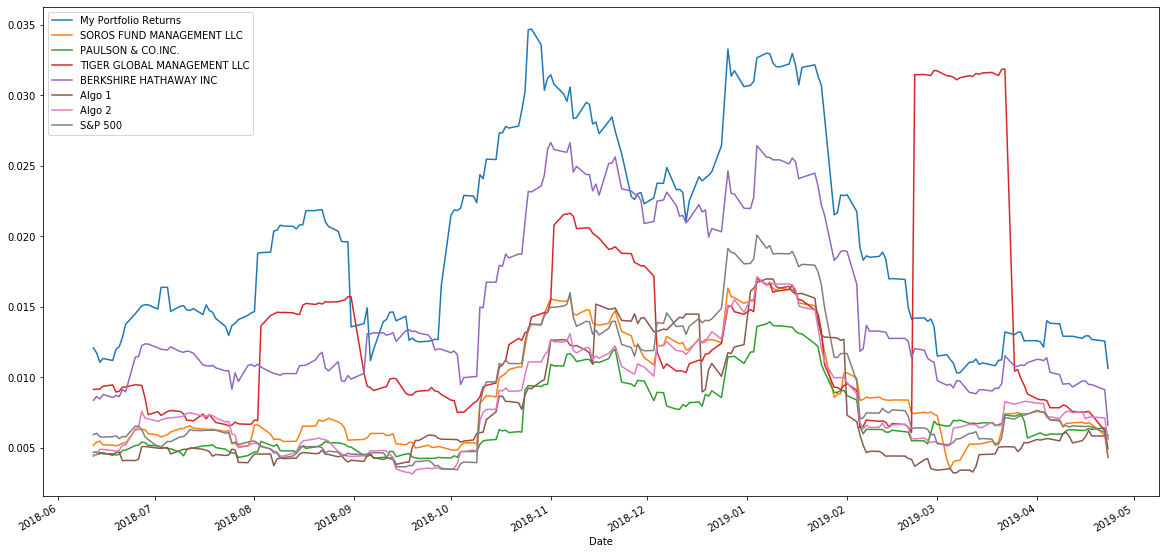

In [114]:
# Rolling
# YOUR CODE HERE
# Calculate and plot the rolling standard deviation using a 21 day trading window for all portfolios
all_portfolios_df.rolling(window=21).std().plot(figsize=(20,10))


---

## Sharpe Ratios 
<a id="shar2"></a>

1. The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
2. A correlation table.

In [115]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
# Calculate annualized Sharpe Ratios
all_portfolios_sharpe_ratios = (all_portfolios_df.mean() * 252) / (all_portfolios_df.std() * np.sqrt(252))
all_portfolios_sharpe_ratios

My Portfolio Returns           0.620002
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

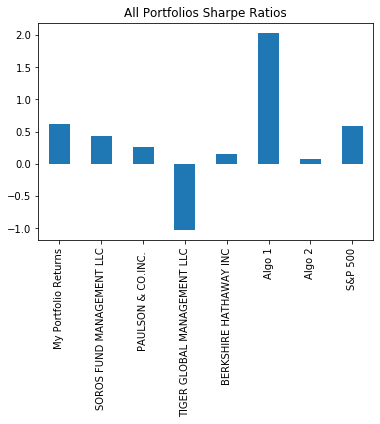

In [116]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe_ratios.plot(kind="bar", title="All Portfolios Sharpe Ratios")


---

## Correlation Analysis
<a id="corr2"></a>

In [117]:
# Create a correlation table
# YOUR CODE HERE
all_portfolios_df.corr()

,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
My Portfolio Returns,1.000000,0.630730,0.512191,0.282961,0.745008,0.233595,0.635825,0.730852
SOROS FUND MANAGEMENT LLC,0.630730,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.512191,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.282961,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.745008,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.233595,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.635825,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.730852,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


In [158]:
# Conduct a correlation analysis
my_portfolio_correlation = pd.DataFrame(all_portfolios_df.corr()).loc[:, "My Portfolio Returns"]
my_portfolio_correlation[my_portfolio_correlation==my_portfolio_correlation[my_portfolio_correlation<1].max()]

BERKSHIRE HATHAWAY INC    0.745008
Name: My Portfolio Returns, dtype: float64

The portfolio that correlates to "My Portfolio Returns" is Berkshire Hathaway Inc. 

---

## Beta Analysis 
<a id="beta"></a>

Using your custom portfolio and one other of your choosing:
The plotted beta. . How does your portfolio fair?

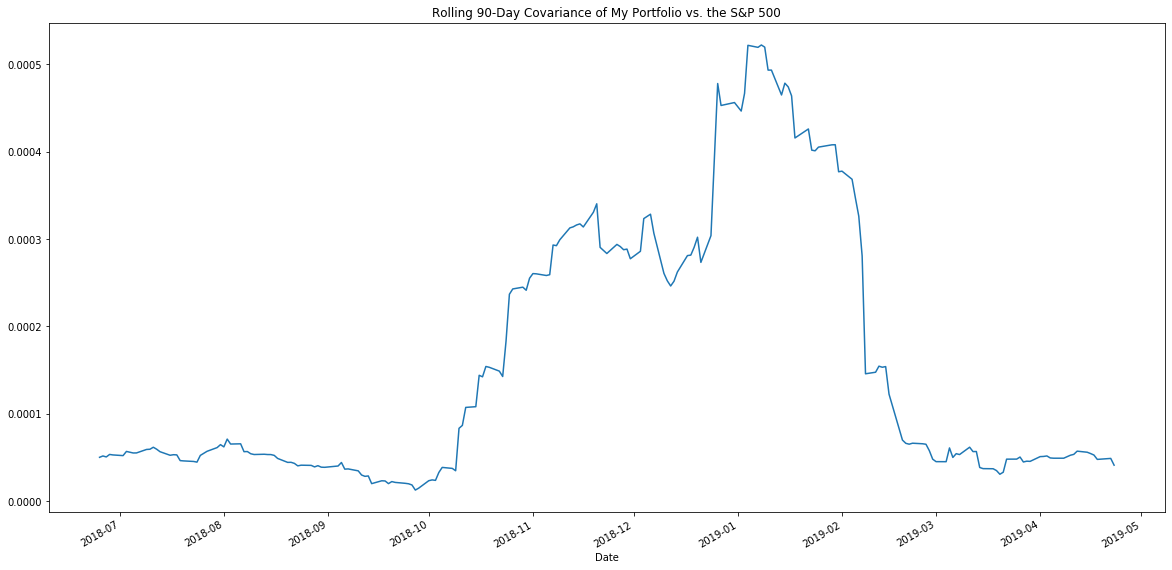

In [173]:
# Beta
# YOUR CODE HERE
# Comparing my custom portfolio to the total market (S&P 500)
# Calculate the rolling covariance for your portfolio ("My Portfolios")
rolling_covariance = all_portfolios_df["My Portfolio Returns"].rolling(window=30).cov(all_portfolios_df["S&P 500"])
rolling_covariance.plot(figsize=(20,10), title="Rolling 90-Day Covariance of My Portfolio vs. the S&P 500")


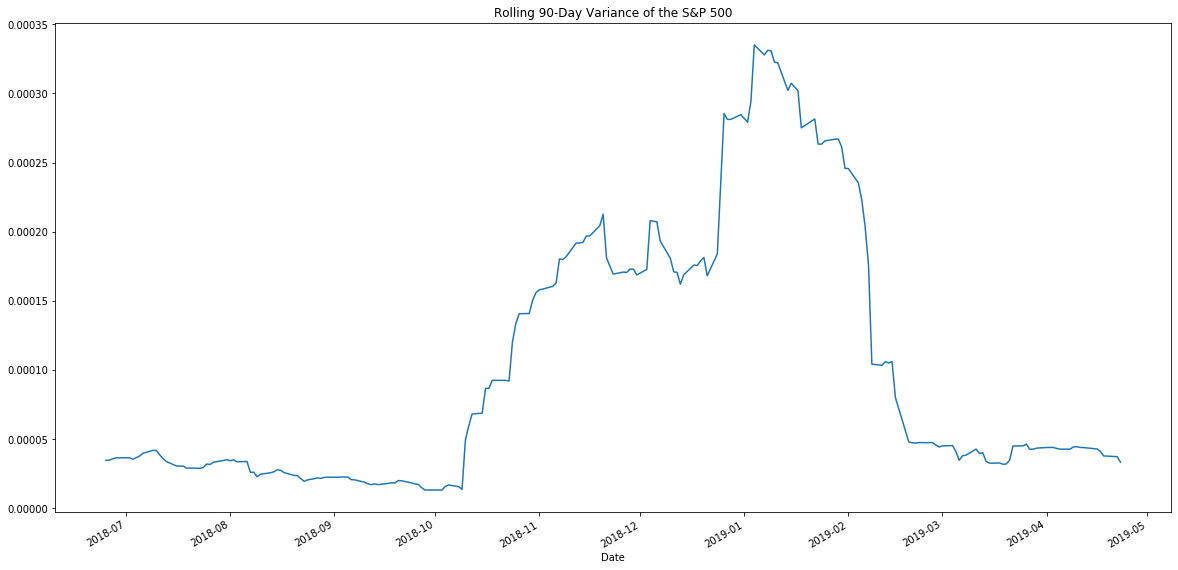

In [174]:
# Comparing my custom portfolio to the total market (S&P 500)
# Calculate the rolling variance for the S&P 500 to compare to your portfolio ("My Portfolios")
rolling_variance = all_portfolios_df["S&P 500"].rolling(window=30).var()
rolling_variance.plot(figsize=(20,10), title="Rolling 90-Day Variance of the S&P 500")

In [178]:
# Beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.tail(20)

Date
2019-03-26    1.094969
2019-03-27    1.058094
2019-03-28    1.076995
2019-03-29    1.054167
2019-04-01    1.166529
2019-04-02    1.170068
2019-04-03    1.181957
2019-04-04    1.149085
2019-04-05    1.156473
2019-04-08    1.156433
2019-04-09    1.151829
2019-04-10    1.187368
2019-04-11    1.223444
2019-04-12    1.310172
2019-04-15    1.305875
2019-04-16    1.276292
2019-04-17    1.288416
2019-04-18    1.269951
2019-04-22    1.318378
2019-04-23    1.243631
dtype: float64

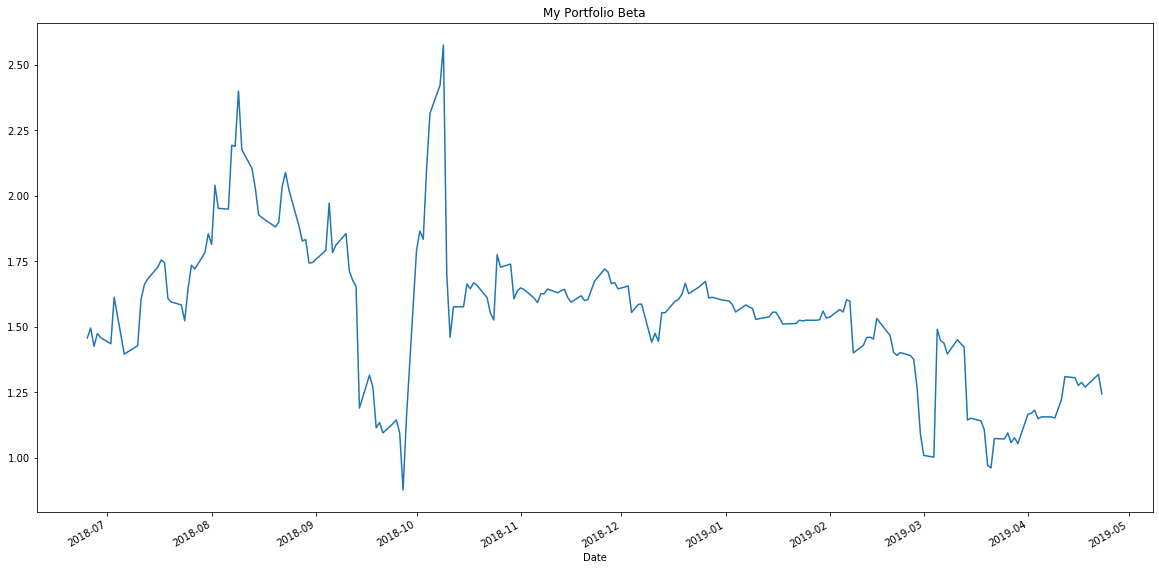

In [176]:
rolling_beta.plot(figsize=(20,10), title="My Portfolio Beta")

---

# Summary: 
<a id="summ"></a>

## How does your portfolio fair? 

### Risk: 
Based on the annualized standard deviation, My Portfolio is a high risk investment. 

### Sharpe Ratio: 
The sharpe ratio analysis indicates My Portfolio outperforms 75% of all portfolio returns. Compared to the S&P 500, My Portfolio performs slightly lower than the market. However, against the Algo 1 portfolio, my selected equities underperform significantly. 

### Rolling Statistics & Beta:
On average, My Portfolio has a beta higher than 1. Indicating the investment is highly sensitive to movements in the market. 

### Conclusion:
Based on the portfolio analysis, My Portfolio has an average performance overview. Although the selected portfolio is considered more volatile than the market, the portfolio has the potential to earn greater expected returns. 
